In [1]:
name = '2017-01-20-function-quirks'
title = 'Some peculiarities of using functions in Python'
tags = 'basics'
author = 'Denis Sergeev'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML, Image

html = connect_notebook_to_post(name, title, tags, author)

## Let's review the basics

### Functions without arguments

In [3]:
def my_super_function():
    pass

In [4]:
def even_better():
    print('This is executed within a function')

In [5]:
even_better()

This is executed within a function


In [6]:
type(even_better)

function

### Positional arguments
aka mandatory parameters

In [7]:
import numpy as np

In [8]:
def uv2wdir(u, v):
    """Calculate horizontal wind direction (meteorological notation)"""
    return 180 + 180 / np.pi * np.arctan2(u, v)

In [9]:
a = uv2wdir(10, -10)
a

315.0

In [10]:
type(a)

numpy.float64

### Keyword (named) arguments
aka optional parameters

In [11]:
def myfun(list_of_strings, separator=' ', another=123):
    result = separator.join(list_of_strings)
    return result

In [12]:
words = ['This', 'is', 'my', 'Function']

In [13]:
myfun(words, another=456, separator='-------')

'This-------is-------my-------Function'

## Dangerous default arguments

In [14]:
default_number = 10

In [15]:
def double_it(x=default_number):
    return x * 2

In [16]:
double_it()

20

In [17]:
double_it(2)

4

In [18]:
default_number = 100000000

In [19]:
double_it()

20

**But what if we used a mutable type as a default argument?**

In [20]:
def add_items_bad(element, times=1, lst=[]):
    for _ in range(times):
        lst.append(element)
    return lst

In [21]:
mylist = add_items_bad('a', 3)
print(mylist)

['a', 'a', 'a']


In [22]:
another_list = add_items_bad('b', 5)
print(another_list)

['a', 'a', 'a', 'b', 'b', 'b', 'b', 'b']


In [23]:
def add_items_good(element, times=1, lst=None):
    if lst is None:
        lst = []

    for _ in range(times):
        lst.append(element)
    return lst

In [24]:
mylist = add_items_good('a', 3)
print(mylist)

['a', 'a', 'a']


In [25]:
another_list = add_items_good('b', 5)
print(another_list)

['b', 'b', 'b', 'b', 'b']


## Global variables

Variables declared outside the function can be referenced within the function:

In [26]:
x = 5

In [27]:
def add_x(y):
    return x + y

In [28]:
add_x(20)

25

But these global variables cannot be modified within the function, unless declared global in the function.

In [29]:
def setx(y):
    global x
    x = y
    print('x is {}'.format(x))

In [30]:
x

5

In [31]:
setx(10)

x is 10


In [32]:
print(x)

10


In [33]:
def foo():
    a = 1
    print(locals())

In [34]:
foo()

{'a': 1}


## Arbitrary number of arguments

Special forms of parameters:
* `*args`: any number of positional arguments packed into a tuple
* `**kwargs`: any number of keyword arguments packed into a dictionary

In [35]:
def variable_args(*args, **kwargs):
    print('args are', args)
    print('kwargs are', kwargs)
    if 'z' in kwargs:
        print(kwargs['z'])

In [36]:
variable_args('foo', 'bar', x=1, y=2)

args are ('foo', 'bar')
kwargs are {'y': 2, 'x': 1}


### Example 1

In [37]:
def smallest(x, y):
    if x < y:
        return x
    else:
        return y

In [38]:
smallest(1, 2)

1

In [39]:
# smallest(1, 2, 3) <- results in TypeError

In [40]:
def smallest(x, *args):
    small = x
    for y in args:
        if y < small:
            small= y
    return small

In [41]:
smallest(11)

11

### Example 2

Unpacking a dictionary of keyword arguments is particularly handy in `matplotlib`.

In [42]:
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [44]:
arr1 = np.random.rand(100)
arr2 = np.random.rand(100)

In [45]:
style1 = dict(linewidth=3, color='#FF0123')
style2 = dict(linestyle='--', color='skyblue')

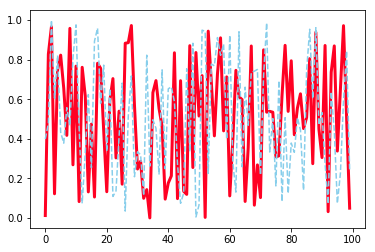

In [46]:
plt.plot(arr1, **style1)
plt.plot(arr2, **style2)

## Passing functions into functions

<img src="https://lifebeyondfife.com/wp-content/uploads/2015/05/functions.jpg" width=400>

Functions are first-class objects. This means that functions can be passed around, and used as arguments, just like any other value (e.g, string, int, float).

In [47]:
def find_special_numbers(special_selector, limit=10):
    found = []
    n = 0
    while len(found) < limit:
        if special_selector(n):
            found.append(n)
        n += 1
    return found

In [48]:
def check_odd(a):
    return a % 2 == 1

In [49]:
mylist = find_special_numbers(check_odd, 25)

In [50]:
for n in mylist:
    print(n, end=',')

1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,

But lots of small functions can clutter your code...

### lambda expressions

Highly pythonic!

`check = i -> return True if i % 6 == 0`

In [51]:
check = lambda i: i % 6 == 0

In [52]:
#check = lambda

Lambdas usually are not defined on their own, but inserted in-place.

In [53]:
find_special_numbers(lambda i: i % 6 == 0, 5)

[0, 6, 12, 18, 24]

#### Another common example

In [54]:
lyric = "Never gonna give you up"

In [55]:
words = lyric.split()
words

['Never', 'gonna', 'give', 'you', 'up']

In [56]:
sorted(words, key=lambda x: x.lower())

['give', 'gonna', 'Never', 'up', 'you']

#### How to sort a list of strings, each of which is a number?

Just using `sorted()` gives us not what we want:

In [57]:
lst = ['20', '1', '2', '100']

In [58]:
sorted(lst)

['1', '100', '2', '20']

But we can use a `lambda`-expression to overcome this problem:

Option 1:

In [59]:
sorted(lst, key=lambda x: int(x))

['1', '2', '20', '100']

Option 2:

In [60]:
sorted(lst, key=lambda x: x.zfill(16))

['1', '2', '20', '100']

By the way, what does `zfill()` method do? It pads a string with zeros:

In [61]:
'aaaa'.zfill(10)

'000000aaaa'

## Resources
* [Write Pythonic Code Like a Seasoned Developer Course Demo Code](https://github.com/mikeckennedy/write-pythonic-code-demos)
* [Scipy Lecture notes](http://www.scipy-lectures.org/intro/language/functions.html)

In [62]:
HTML(html)